title of the project

## 1. Importing Necessary Modules & Loading the Data

 I start by importing any necessary modules, as shown. Following this, I will import our data (mnist): 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.datasets import fetch_openml
from sklearn.multiclass import OneVsRestClassifier


mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
np.random.seed(42)

In this part, I will use my model trained on the MNIST dataset to predict labels for new data, which consists of images of handwritten digits that I scanned.

In [6]:
# Load the trained MNIST model
model = joblib.load("mnist_ensemble_final.pkl")

print("Model loaded successfully.")

Model loaded successfully.


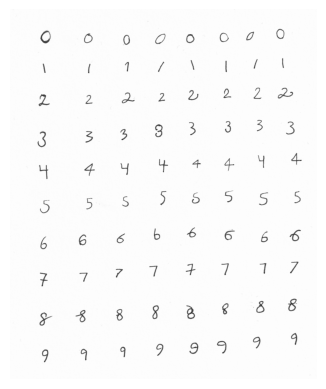

In [7]:
import cv2
image = cv2.imread(r"C:\Users\marya\Desktop\Digits_test_MHN.jpg", cv2.IMREAD_GRAYSCALE)

# Convert grayscale to RGB (although grayscale has no color channels)
img_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)  

# Display the image
plt.imshow(img_rgb, cmap="gray")  # Use 'gray' to display grayscale images correctly
plt.axis("off")  # Hide axis
plt.show()

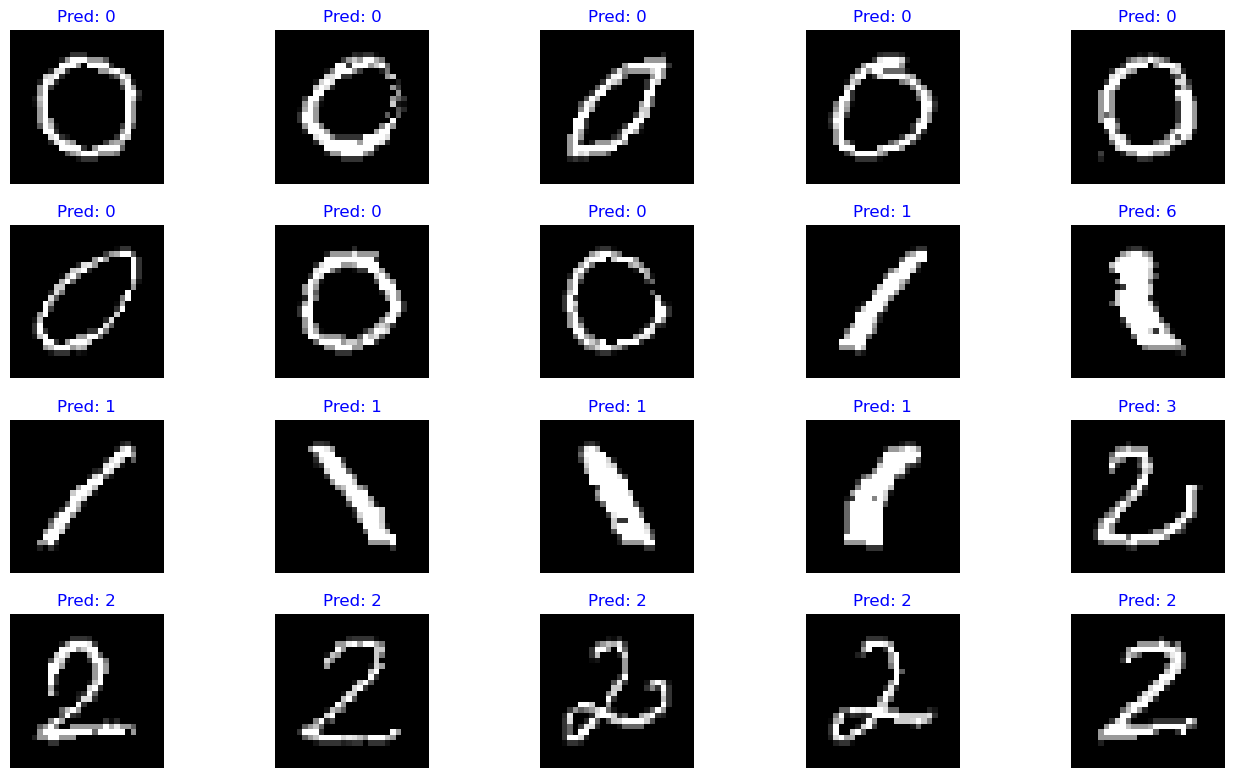

In [ ]:
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

# Paths
folder_path = r"C:\Users\marya\Desktop\Machine Learning\Kunskapskontroll_2\Kunskapskontroll 2\digit_images"
image_files = sorted(glob.glob(os.path.join(folder_path, "*.png")), 
                     key=lambda x: int(os.path.basename(x).split('_')[1].split('.')[0]))

# Corrected digit-centering function
def center_digit(img):
    rows, cols = img.shape
    if rows > cols:
        factor = 20.0 / rows
        rows = 20
        cols = int(round(cols * factor))
    else:
        factor = 20.0 / cols
        cols = 20
        rows = int(round(rows * factor))

    resized_digit = cv2.resize(img, (cols, rows))
    canvas = np.zeros((28, 28), dtype=np.uint8)

    x_offset = (28 - cols) // 2
    y_offset = (28 - rows) // 2

    canvas[y_offset:y_offset+rows, x_offset:x_offset+cols] = resized_digit
    return canvas

# Prepare images
X_new = []

for file in image_files:
    digit_img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    _, digit_img = cv2.threshold(digit_img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    digit_centered = center_digit(digit_img)
    digit_normalized = digit_centered / 255.0
    digit_flat = digit_normalized.flatten()
    X_new.append(digit_flat)

X_new = np.vstack(X_new)

# Run predictions
predictions = model.predict(X_new)

# Visualization (first 20 predictions)
plt.figure(figsize=(14, 8))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_new[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predictions[i]}", fontsize=12, color='blue')
    plt.axis('off')

plt.tight_layout(pad=1.5)
plt.show()


In [ ]:
actual_digits = [digit for digit in range(10) for _ in range(8)]

Accuracy: 0.5454545454545454


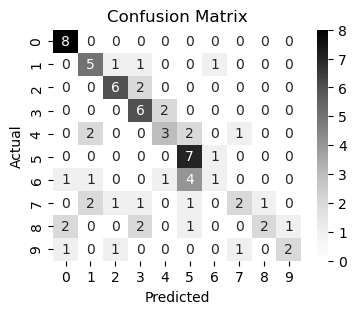


Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       0.50      0.62      0.56         8
           2       0.67      0.75      0.71         8
           3       0.50      0.75      0.60         8
           4       0.50      0.38      0.43         8
           5       0.47      0.88      0.61         8
           6       0.33      0.12      0.18         8
           7       0.50      0.25      0.33         8
           8       0.67      0.25      0.36         8
           9       0.67      0.40      0.50         5

    accuracy                           0.55        77
   macro avg       0.55      0.54      0.51        77
weighted avg       0.54      0.55      0.51        77



In [ ]:
# Define the true labels explicitly
y_true = np.array(actual_digits[:len(predictions)])

# Calculate accuracy
accuracy = accuracy_score(y_true, predictions)
print(f"Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_true, predictions)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Grays", fmt='d', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, predictions))


In [ ]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data / 255.0, mnist.target.astype(int)

# Combine your data with MNIST
X_combined = np.vstack((X, X_new))
y_combined = np.hstack((y, y_true))

model.fit(X_combined, y_combined)

# Predict again with fine-tuned model
prediction_combind = model.predict(X_new)

# Check accuracy again
combined_accuracy = accuracy_score(y_true, prediction_combind)
print("Fine-tuned Accuracy:", combined_accuracy)


Fine-tuned Accuracy: 1.0


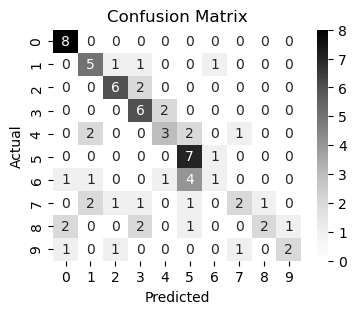


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         5

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77



In [ ]:
# Confusion Matrix
cm_combined = confusion_matrix(y_true, prediction_combind)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Grays", fmt='d', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, prediction_combind))


# Summary and analysis
In this section, write down a summary of your work and some analysis. 

In this task, the "MNIST" dataset was loaded and split into three subsets (training, validation, and testing) in two steps. Three different models (Random Forest Classifier, Extra Trees Classifier, and Linear SVC) were trained on the dataset, with "Extra Trees " achieving the highest validation accuracy (97.15%).

Next, a "Voting Classifier" was created to combine the three models. However, the best-performing model remained Extra Trees, confirming that it was the most effective for this task.

Since the test accuracy (96.91%) of "Extra Trees model" was close to its validation accuracy (97.15%), meaning no significant overfitting.